This Notebook will walk you through the process of using the LEXI code with the final goal of
producing and saving x-ray data from LEXI spacecraft.

`LEXI`, in this context, is a package developed in Python to ingest the data from the
[LEXI](https://sites.bu.edu/lexi/) spacecraft and produce x-ray data images in RA-DEC coordinate system.

## LEXI package description

`LEXI` package has the following functions:
  - `get_spc_prams`
  - `get_exposure_maps`
  - `get_sky_backgrounds`
  - `get_lexi_images`

Details of each function are described in the following sections.

### `get_spc_prams`

- `get_spc_prams`: to get the spacecraft's ephemeris data. It takes the following inputs:
- Required:
    - `t_range`: a list of two elements, the start and end time of the observation in UTC. The format
    of the time can be any of the following:
    - string: `YYYY-MM-DD HH:MM:SS`
    - float: Unix time or the number of seconds since 1970-01-01 00:00:00 UTC
    - datetime object: `datetime.datetime(YYYY, MM, DD, HH, MM, SS)`
    - Optional:
    - None
The function returns the interpolated ephemeris data in a pandas dataframe.
Output:
    - A pandas dataframe with the following columns:
    - `epoch_utc`: Time in UTC
    - `ra`: Right Ascension in degrees
    - `dec`: Declination in degrees
    - `roll`: Roll angle in degrees
    The interpolation is done internally on the ephemeris data using the `t_step` parameter. `t_step`
    is the time step in seconds at which the user desires to have look-direction computed. The
    default value is set to 5 seconds and is sufficient for most of the cases. The user can change it
    to a different value if needed.

### `get_spc_prams`

- `get_exposure_maps`: The function to compute the exposure map for any given time interval. It
takes the following inputs:
- Required:
    - `t_range`: a list of two elements, the start and end time of the observation in UTC. The format
    of the time can be any of the following:
    - string: `YYYY-MM-DD HH:MM:SS`
    - float: Unix time or the number of seconds since 1970-01-01 00:00:00 UTC
    - datetime object: `datetime.datetime(YYYY, MM, DD, HH, MM, SS)`
    Using the `t_range` parameter, the function will call `get_spc_prams` internally to get the
    ephemeris data.
- Optional:
    - `ra_range`: a list of two elements, the start and end RA of over which the user want the
    exposure maps to be computed. If not provided, the function computes the exposure map over
    the entire range of possible RA values (0 to 360 degrees).
    - `dec_range`: a list of two elements, the start and end Dec of over which the user want the
    exposure maps to be computed. If not provided, the function computes the exposure map over
    the entire range of possible Dec values (-90 to 90 degrees).
    - `ra_res`: the resolution of the RA bins in degrees. The default value is set to 0.1 degrees.
    The user can change it to a different value if needed.
    - `dec_res`: the resolution of the Dec bins in degrees. The default value is set to 0.1
    degrees.
    - `nbins`: The number of bins to be used while computing the exposure map. It can be a single
    integer or a list of two integers. If a single integer is provided, the function will use
    the same number of bins for both RA and Dec. If a list of two integers is provided, the
    first element will be used for RA and the second element will be used for Dec. Note that if
    `ra_res` and `dec_res` are provided, the function will use the number of bins computed from
    the resolution values. However, if either of them is not provided, the function will use the 
    number of bins provided by the user.
    - `t_step`: time step in seconds at which the user desires to have look-direction computed.
    The default value is set to 5 seconds and is sufficient for most of the cases. The user can
    change it to a different value if needed.
    - `t_integrate`: the integration time in seconds. This the length of time for wwhich each
    exposure map is computed. The default value is set to 600 seconds (10 minutes). If it is not
    provided by the user, the function will assume the time difference between the start and end
    time of the observation as the integration time. For example, if the provided `t_range` is
    `['2020-01-01 00:00:00', '2020-01-01 02:10:00']`, the function will assume the integration
    time to be 7800 seconds (2 hours and 10 minutes). However, if the user provides a different
    `integration_time`, let's say 600 seconds, the function will compute the exposure maps for 10
    minutes each, there by producing 22 exposure maps.
    - `save_exposure_maps`: a boolean value to indicate whether the user wants to save the
    exposure maps as a PNG files. The default value is set to `False`. If the user wants to save
    the exposure maps, the function will save them in the a folder named `figures/exposure_maps/`
    in the current working directory. The function will also create a `.npy` file containing the
    the in a folder named `data/exposure_maps/` in the current working directory. The name of the 
    `.npy` file will be
    `lexi_exposure_maps_Tstart_[YYYYMMDD_HHMMSS]_Tstop_[YYYYMMDD_HHMMSS]_RAstart_[RAstart]_RAstop_[RAstop]_Decstart_[Decstart]_Decstop_[Decstop]_RAres_[RAres]_Decres_[Decres]_tint_[tint].npy`.
    In the namefile, everything witihn the square brackets will be replaced by the actual values
    as computed by the function. For example, if the user provides the following inputs:
    - `t_range`: `['2020-01-01 00:00:00', '2020-01-01 02:10:00']`
    - `ra_range`: `[0, 360]`
    - `dec_range`: `[-90, 90]`
    - `ra_res`: `0.1`
    - `dec_res`: `0.1`
    - `nbins`: `[3600, 1800]`
    - `t_step`: `5`
    - `t_integrate`: `600`
    The function will save the exposure maps as
    `lexi_exposure_maps_Tstart_20200101_000000_Tstop_20200101_021000_RAstart_0_RAstop_360_Decstart_-90_Decstop_90_RAres_0.1_Decres_0.1_tint_600.npy`
    in the `data/exposure_maps/` folder and the PNG files in the `figures/exposure_maps/` folder.
    
The function returns the following:
- `exposure_maps`: a numpy array containing the exposure maps. The shape of the array is
    `(nbins_time, nbins_dec, nbins_ra)`. The `nbins_time` is the number of exposure maps computed
    for the given `t_range` and `t_integrate`. The `nbins_dec` and `nbins_ra` are the number of
    bins computed for the given `dec_res` and `ra_res` respectively. The unit of the exposure maps
    is `seconds` for each bin in the array.
- `ra_arr`: a numpy array containing the RA values for the exposure maps. The shape of the array
    is `(nbins_ra,)`.
- `dec_arr`: a numpy array containing the Dec values for the exposure maps. The shape of the
    array is `(nbins_dec,)`.
- Images in the PNG format saved in the `figures/exposure_maps/` folder if `save_exposure_maps`
    is set to `True`.

### `get_sky_backgrounds`

- `get_sky_backgrounds`: The function to compute the sky backgrounds for any given time interval
using the ROSAT data.
It takes the following inputs:
- Required:
    - `t_range`: a list of two elements, the start and end time of the observation in UTC. The format
    of the time can be any of the following:
    - string: `YYYY-MM-DD HH:MM:SS`
    - float: Unix time or the number of seconds since 1970-01-01 00:00:00 UTC
    - datetime object: `datetime.datetime(YYYY, MM, DD, HH, MM, SS)`
    Using the `t_range` parameter, the function will call `get_spc_prams` internally to get the
    ephemeris data. The function will also call `get_exposure_maps` internally to get the exposure
    maps.
- Optional:
    - `ra_range`: a list of two elements, the start and end RA of over which the user want the
    sky backgrounds to be computed. If not provided, the function computes the sky backgrounds
    over the entire range of possible RA values (0 to 360 degrees).
    - `dec_range`: a list of two elements, the start and end Dec of over which the user want the
    sky backgrounds to be computed. If not provided, the function computes the sky backgrounds
    over the entire range of possible Dec values (-90 to 90 degrees).
    - `ra_res`: the resolution of the RA bins in degrees. The default value is set to 0.1 degrees.
    The user can change it to a different value if needed.
    - `dec_res`: the resolution of the Dec bins in degrees. The default value is set to 0.1
    degrees.
    - `nbins`: The number of bins to be used while computing the sky backgrounds. It can be a single
    integer or a list of two integers. If a single integer is provided, the function will use
    the same number of bins for both RA and Dec. If a list of two integers is provided, the
    first element will be used for RA and the second element will be used for Dec. Note that if
    `ra_res` and `dec_res` are provided, the function will use the number of bins computed from
    the resolution values. However, if either of them is not provided, the function will use the 
    number of bins provided by the user.
    - `t_step`: time step in seconds at which the user desires to have look-direction computed.
    The default value is set to 5 seconds and is sufficient for most of the cases. The user can
    change it to a different value if needed.
    - `t_integrate`: the integration time in seconds. This the length of time for wwhich each
    exposure map is computed. The default value is set to 600 seconds (10 minutes). If it is not
    provided by the user, the function will assume the time difference between the start and end
    time of the observation as the integration time. For example, if the provided `t_range` is
    `['2020-01-01 00:00:00', '2020-01-01 02:10:00']`, the function will assume the integration
    time to be 7800 seconds (2 hours and 10 minutes). However, if the user provides a different
    `integration_time`, let's say 600 seconds, the function will compute the exposure maps for 10
    minutes each, there by producing 22 sky background images.
    - `save_sky_backgrounds`: a boolean value to indicate whether the user wants to save the
    sky background images as a PNG files. The default value is set to `False`. If the user wants to
    save the sky background images, the function will save them in the a folder named
    `figures/sky_backgrounds/` in the current working directory.

The function returns the following:
- `sky_backgrounds`: a numpy array containing the sky backgrounds. The shape of the array is
    `(nbins_time, nbins_dec, nbins_ra)`. The `nbins_time` is the number of sky background images
    computed for the given `t_range` and `t_integrate`. The `nbins_dec` and `nbins_ra` are the
    number of bins computed for the given `dec_res` and `ra_res` respectively. The unit of the sky
    backgrounds is `counts` for each bin in the array.
- `ra_arr`: a numpy array containing the RA values for the sky backgrounds. The shape of the
    array is `(nbins_ra,)`.
- `dec_arr`: a numpy array containing the Dec values for the sky backgrounds. The shape of the
    array is `(nbins_dec,)`.
- Images in the PNG format saved in the `figures/sky_backgrounds/` folder if `save_sky_backgrounds`
    is set to `True`.


### `get_lexi_images`

- `get_lexi_images`: The function to compute the background corrected or uncorrected x-ray image
from LEXI data. The function takes the following inputs:
- Required:
    - `t_range`: a list of two elements, the start and end time of the observation in UTC. The format
    of the time can be any of the following:
    - string: `YYYY-MM-DD HH:MM:SS`
    - float: Unix time or the number of seconds since 1970-01-01 00:00:00 UTC
    - datetime object: `datetime.datetime(YYYY, MM, DD, HH, MM, SS)`
    Using the `t_range` parameter, the function will call `get_spc_prams` internally to get the
    ephemeris data. The function will also call `get_exposure_maps` internally to get the exposure
    maps. The function will also call `get_sky_backgrounds` internally to get the sky backgrounds.

- Optional:
    - `background_correction_on`: a boolean value to indicate whether the user wants to apply the
    background correction to the x-ray image. The default value is set to `True`. If the user
    wants to apply the background correction, the function will subtract the sky backgrounds from
    the x-ray image.
    - `ra_range`: a list of two elements, the start and end RA of over which the user want the
    sky backgrounds to be computed. If not provided, the function computes the sky backgrounds
    over the entire range of possible RA values (0 to 360 degrees).
    - `dec_range`: a list of two elements, the start and end Dec of over which the user want the
    sky backgrounds to be computed. If not provided, the function computes the sky backgrounds
    over the entire range of possible Dec values (-90 to 90 degrees).
    - `ra_res`: the resolution of the RA bins in degrees. The default value is set to 0.1 degrees.
    The user can change it to a different value if needed.
    - `dec_res`: the resolution of the Dec bins in degrees. The default value is set to 0.1
    degrees.
    - `nbins`: The number of bins to be used while computing the sky backgrounds. It can be a single
    integer or a list of two integers. If a single integer is provided, the function will use
    the same number of bins for both RA and Dec. If a list of two integers is provided, the
    first element will be used for RA and the second element will be used for Dec. Note that if
    `ra_res` and `dec_res` are provided, the function will use the number of bins computed from
    the resolution values. However, if either of them is not provided, the function will use the 
    number of bins provided by the user.
    - `t_step`: time step in seconds at which the user desires to have look-direction computed.
    The default value is set to 5 seconds and is sufficient for most of the cases. The user can
    change it to a different value if needed.
    - `t_integrate`: the integration time in seconds. This the length of time for wwhich each
    exposure map is computed. The default value is set to 600 seconds (10 minutes). If it is not
    provided by the user, the function will assume the time difference between the start and end
    time of the observation as the integration time. For example, if the provided `t_range` is
    `['2020-01-01 00:00:00', '2020-01-01 02:10:00']`, the function will assume the integration
    time to be 7800 seconds (2 hours and 10 minutes). However, if the user provides a different
    `integration_time`, let's say 600 seconds, the function will compute the exposure maps for 10
    minutes each, there by producing 22 sky background images.

The function returns the following:
- `lexi_images`: a numpy array containing the x-ray images. The shape of the array is
    `(nbins_time, nbins_dec, nbins_ra)`. The `nbins_time` is the number of x-ray images
    computed for the given `t_range` and `t_integrate`. The `nbins_dec` and `nbins_ra` are the
    number of bins computed for the given `dec_res` and `ra_res` respectively. The unit of the x-ray
    images is `counts` for each bin in the array.
- `ra_arr`: a numpy array containing the RA values for the x-ray images. The shape of the
    array is `(nbins_ra,)`.
- `dec_arr`: a numpy array containing the Dec values for the x-ray images. The shape of the
    array is `(nbins_dec,)`.
- Images in the PNG format saved in the `figures/lexi_images/` folder.


## Using the LEXI Code

### Import the LEXI package from the `lexi` folder
NOTE: The following cell is only needed if you are running this notebook from the `examples` folder.
This is beccause the code still uses `sample_lexi_pointing_ephem_edited.csv` and
`sample_xray_background.csv` files from the to get the ephemeries and the x-ray background data.


In [3]:
# Import LEXI
from lexi.lexi import LEXI


In [4]:
# Check if lexi was imported correctly by printing the main LEXI docstring
print(LEXI.__doc__)



    A LEXI class for generating LEXI images based in either user input or default parameters.

    Attributes:
        LEXI_FOV: float
            The LEXI field of view in degrees. It is a fixed value of 9.1 degrees.
        CDA_LINK: str
            The link to the CDAweb website, from which ephemeris data are pulled.
        save_df: bool
            If True, save the dataframe to a file.
        filename: str
            Filename to save df to.
        filetype: str
            Filetype to save df to. Options: 'csv','pkl'
        interp_method: str
            Interpolation method used when upsampling/resampling ephemeris data, ROSAT data. Options:
            'linear', 'index', 'values', 'pad'. See pandas.DataFrame.interpolate documentation for
            more information. Default is 'index'.
        background_correction_on: bool
            Toggle background correction. Default is True. If False, background correction is not
            applied to the LEXI images. If True, bac

In [5]:
# Set up the lexi instance using a dictionary of parameters and values as follows:
# Refer to the LEXI docstring for a description of each parameter

lexi = LEXI(
    {
        "t_range": [
            "2024-07-08T21:43:41",
            "2024-07-08T21:47:48",
        ],
        "ra_range": [290, 360],
        "dec_range": [290, 360],
        "ra_res": 4,
        "dec_res": 3,
        "background_correction_on": False,
        "save_exposure_maps": True,
        "save_sky_backgrounds": True,
        "save_lexi_images": True,
    }
)


In [6]:
# Get space params
df_space_params = lexi.get_spc_prams()


/home/vetinari/Desktop/git/Lexi-Bu/lexi/lexi/lexi.py:228: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dfinterp = dfresamp.interpolate(method=self.interp_method)


In [7]:
# Look at the space params
df_space_params.head()


,epoch_utc,epoch_mjd,earth_ra,earth_dec,sun_ra,sun_dec,sco_ra,sco_dec,mp_az,mp_el,mp_ra,mp_dec
epoch_utc,,,,,,,,,,,,
2024-07-08 21:44:00,Jul 08 2024 21:44:00.000000000,60499.905980,324.955849,-18.047999,108.192588,22.372788,244.982213,-15.640577,248.464172,37.481432,335.293995,-14.326040
2024-07-08 21:44:05,NaN,60499.906038,324.956541,-18.047728,108.192646,22.372781,244.982213,-15.640577,248.464264,37.481413,335.294663,-14.325745
2024-07-08 21:44:10,NaN,60499.906097,324.957233,-18.047457,108.192703,22.372775,244.982213,-15.640577,248.464357,37.481394,335.295330,-14.325450
2024-07-08 21:44:15,NaN,60499.906155,324.957924,-18.047186,108.192761,22.372768,244.982213,-15.640577,248.464449,37.481374,335.295998,-14.325155
2024-07-08 21:44:20,NaN,60499.906213,324.958616,-18.046915,108.192819,22.372762,244.982213,-15.640577,248.464542,37.481355,335.296665,-14.324860


In [8]:
# Print a list of all the keys in the space params
df_space_params.keys()


Index(['epoch_utc', 'epoch_mjd', 'earth_ra', 'earth_dec', 'sun_ra', 'sun_dec',
       'sco_ra', 'sco_dec', 'mp_az', 'mp_el', 'mp_ra', 'mp_dec'],
      dtype='object')

/home/vetinari/Desktop/git/Lexi-Bu/lexi/lexi/lexi.py:228: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dfinterp = dfresamp.interpolate(method=self.interp_method)


Exposure map loaded from file  /home/vetinari/Desktop/git/Lexi-Bu/lexi/data/exposure_maps/lexi_exposure_map_Tstart_20240708_214341_Tstop_20240708_214748_RAstart_290_RAstop_360_RAres_4_DECstart_290_DECstop_360_DECres_3_Tint_247.npy 

Saving exposure maps as images
Saved figure to figures/exposure_maps/exposure_map_0.png


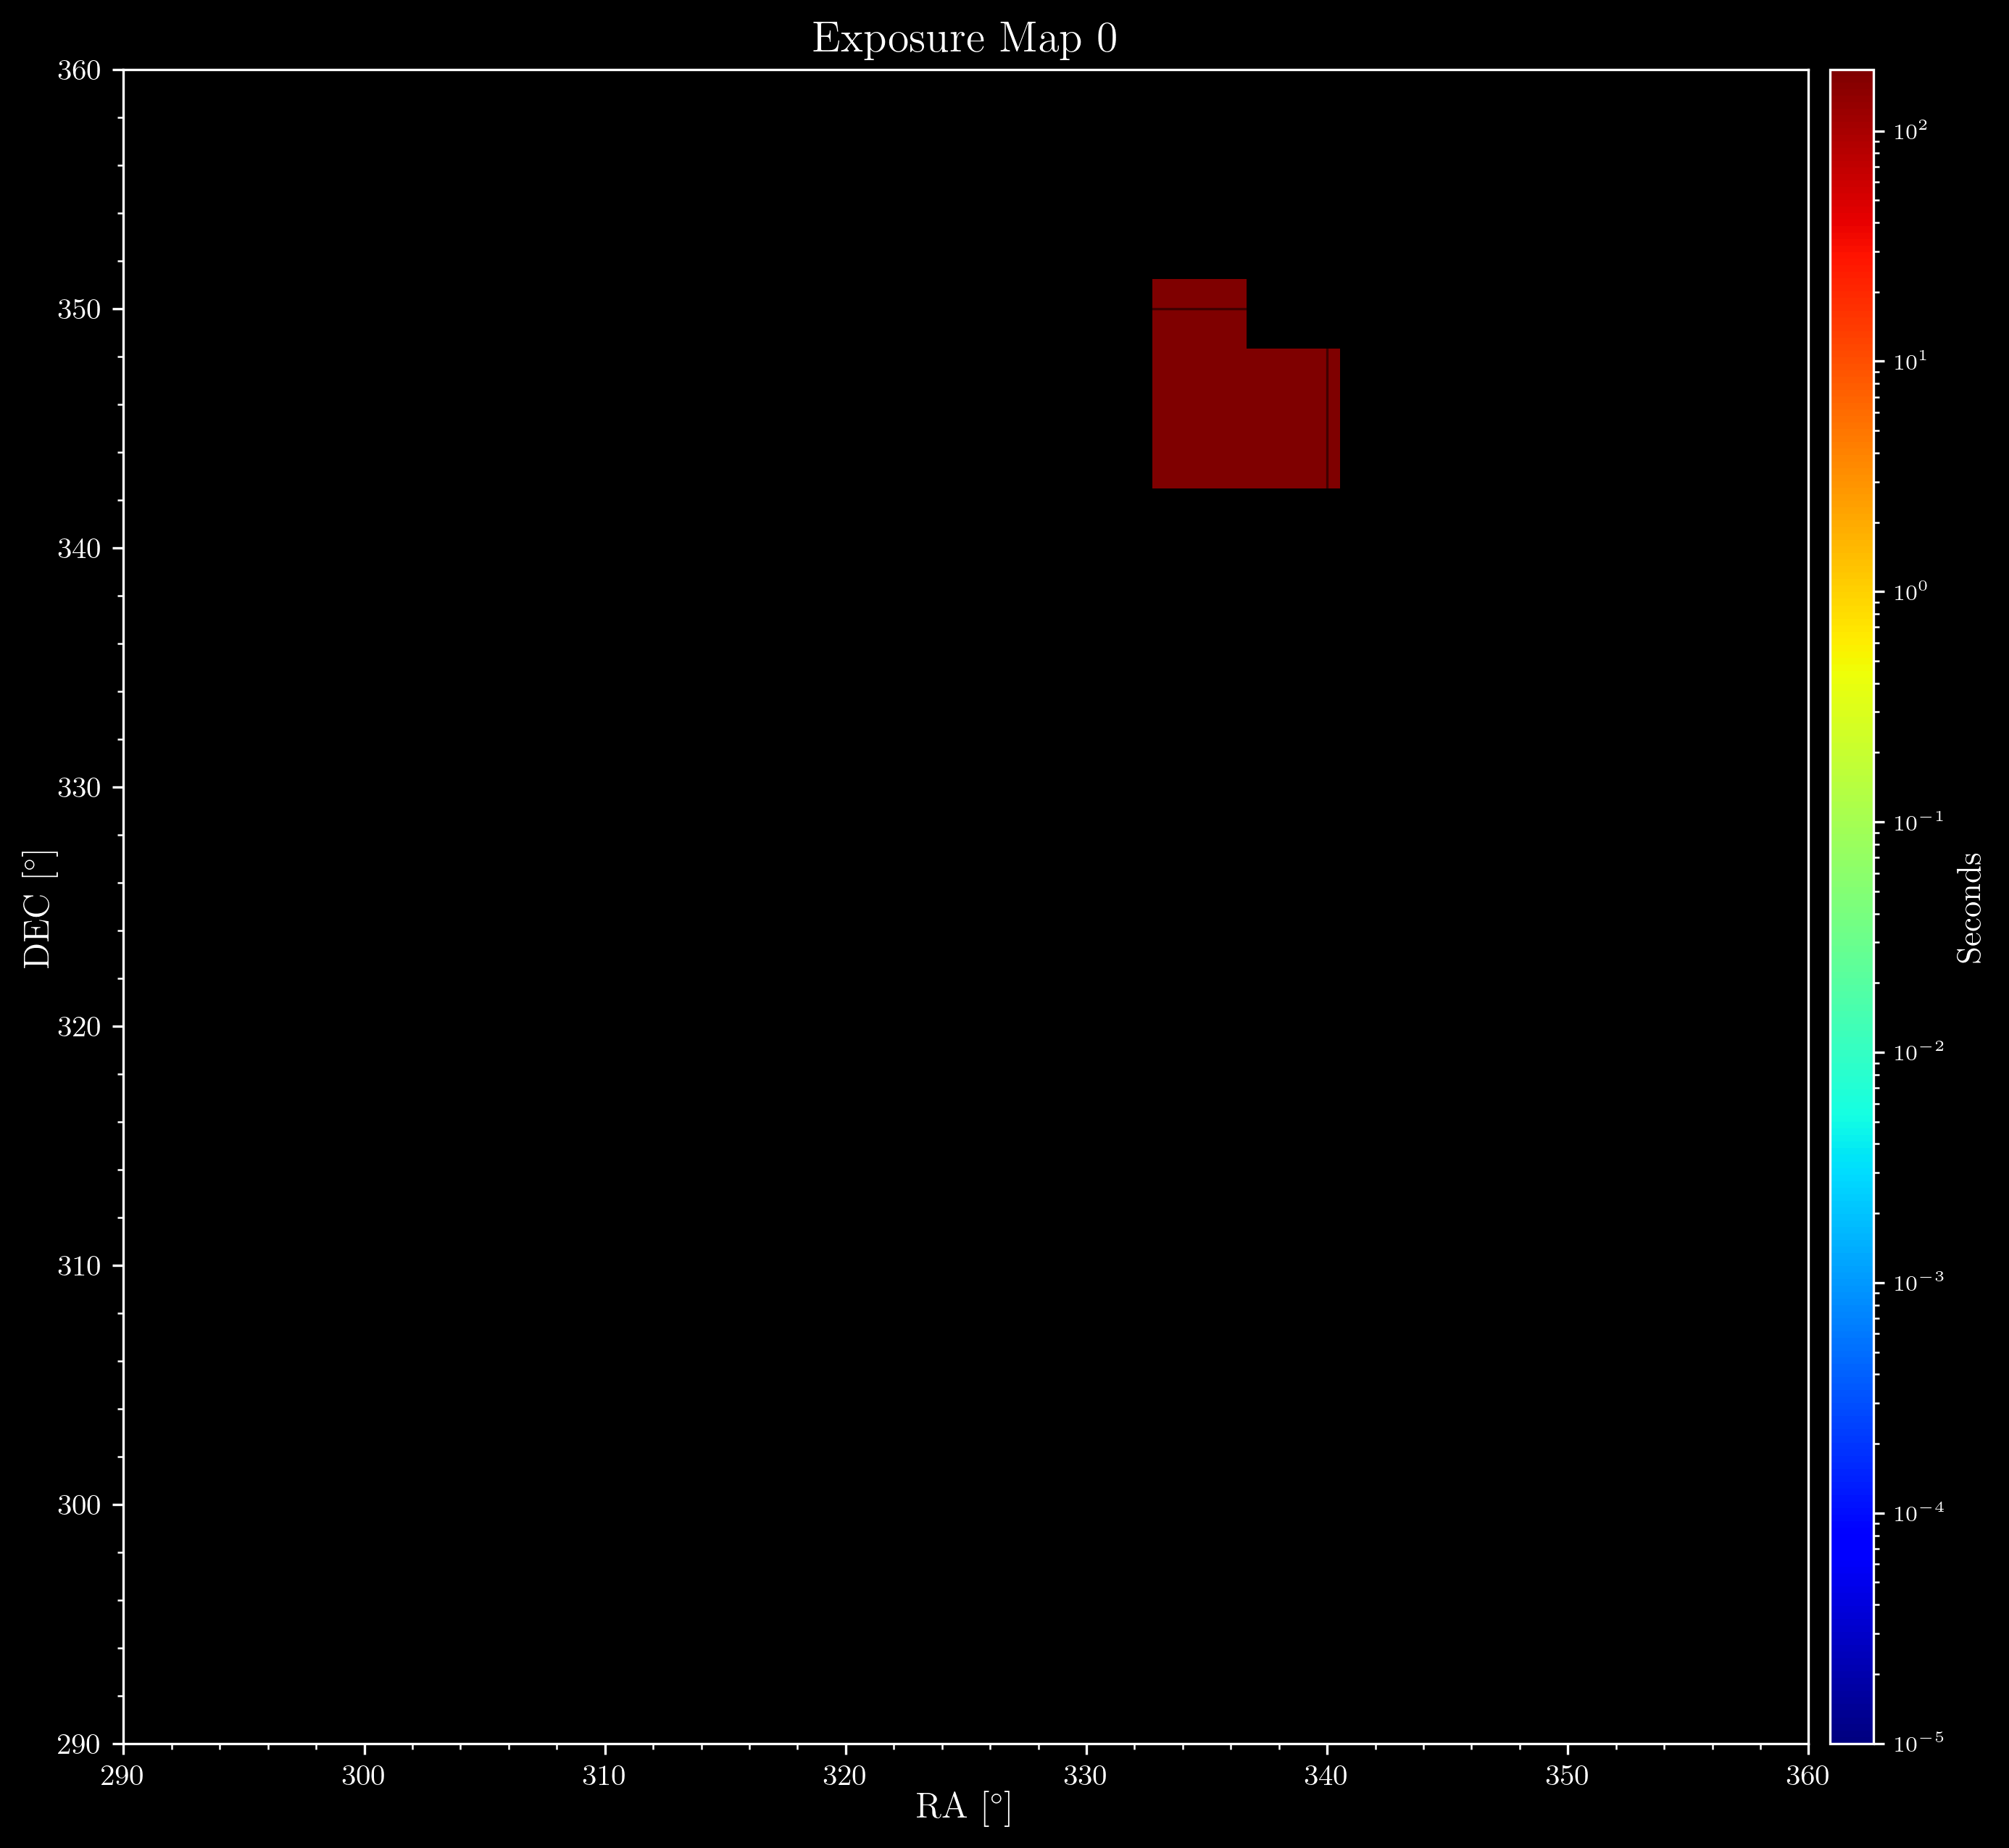

In [9]:
# Get exposure maps
expmaps, ra_arr, dec_arr = lexi.get_exposure_maps()


/home/vetinari/Desktop/git/Lexi-Bu/lexi/lexi/lexi.py:228: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dfinterp = dfresamp.interpolate(method=self.interp_method)


Exposure map loaded from file  /home/vetinari/Desktop/git/Lexi-Bu/lexi/data/exposure_maps/lexi_exposure_map_Tstart_20240708_214341_Tstop_20240708_214748_RAstart_290_RAstop_360_RAres_4_DECstart_290_DECstop_360_DECres_3_Tint_247.npy 

Saving exposure maps as images
Saved figure to figures/exposure_maps/exposure_map_0.png


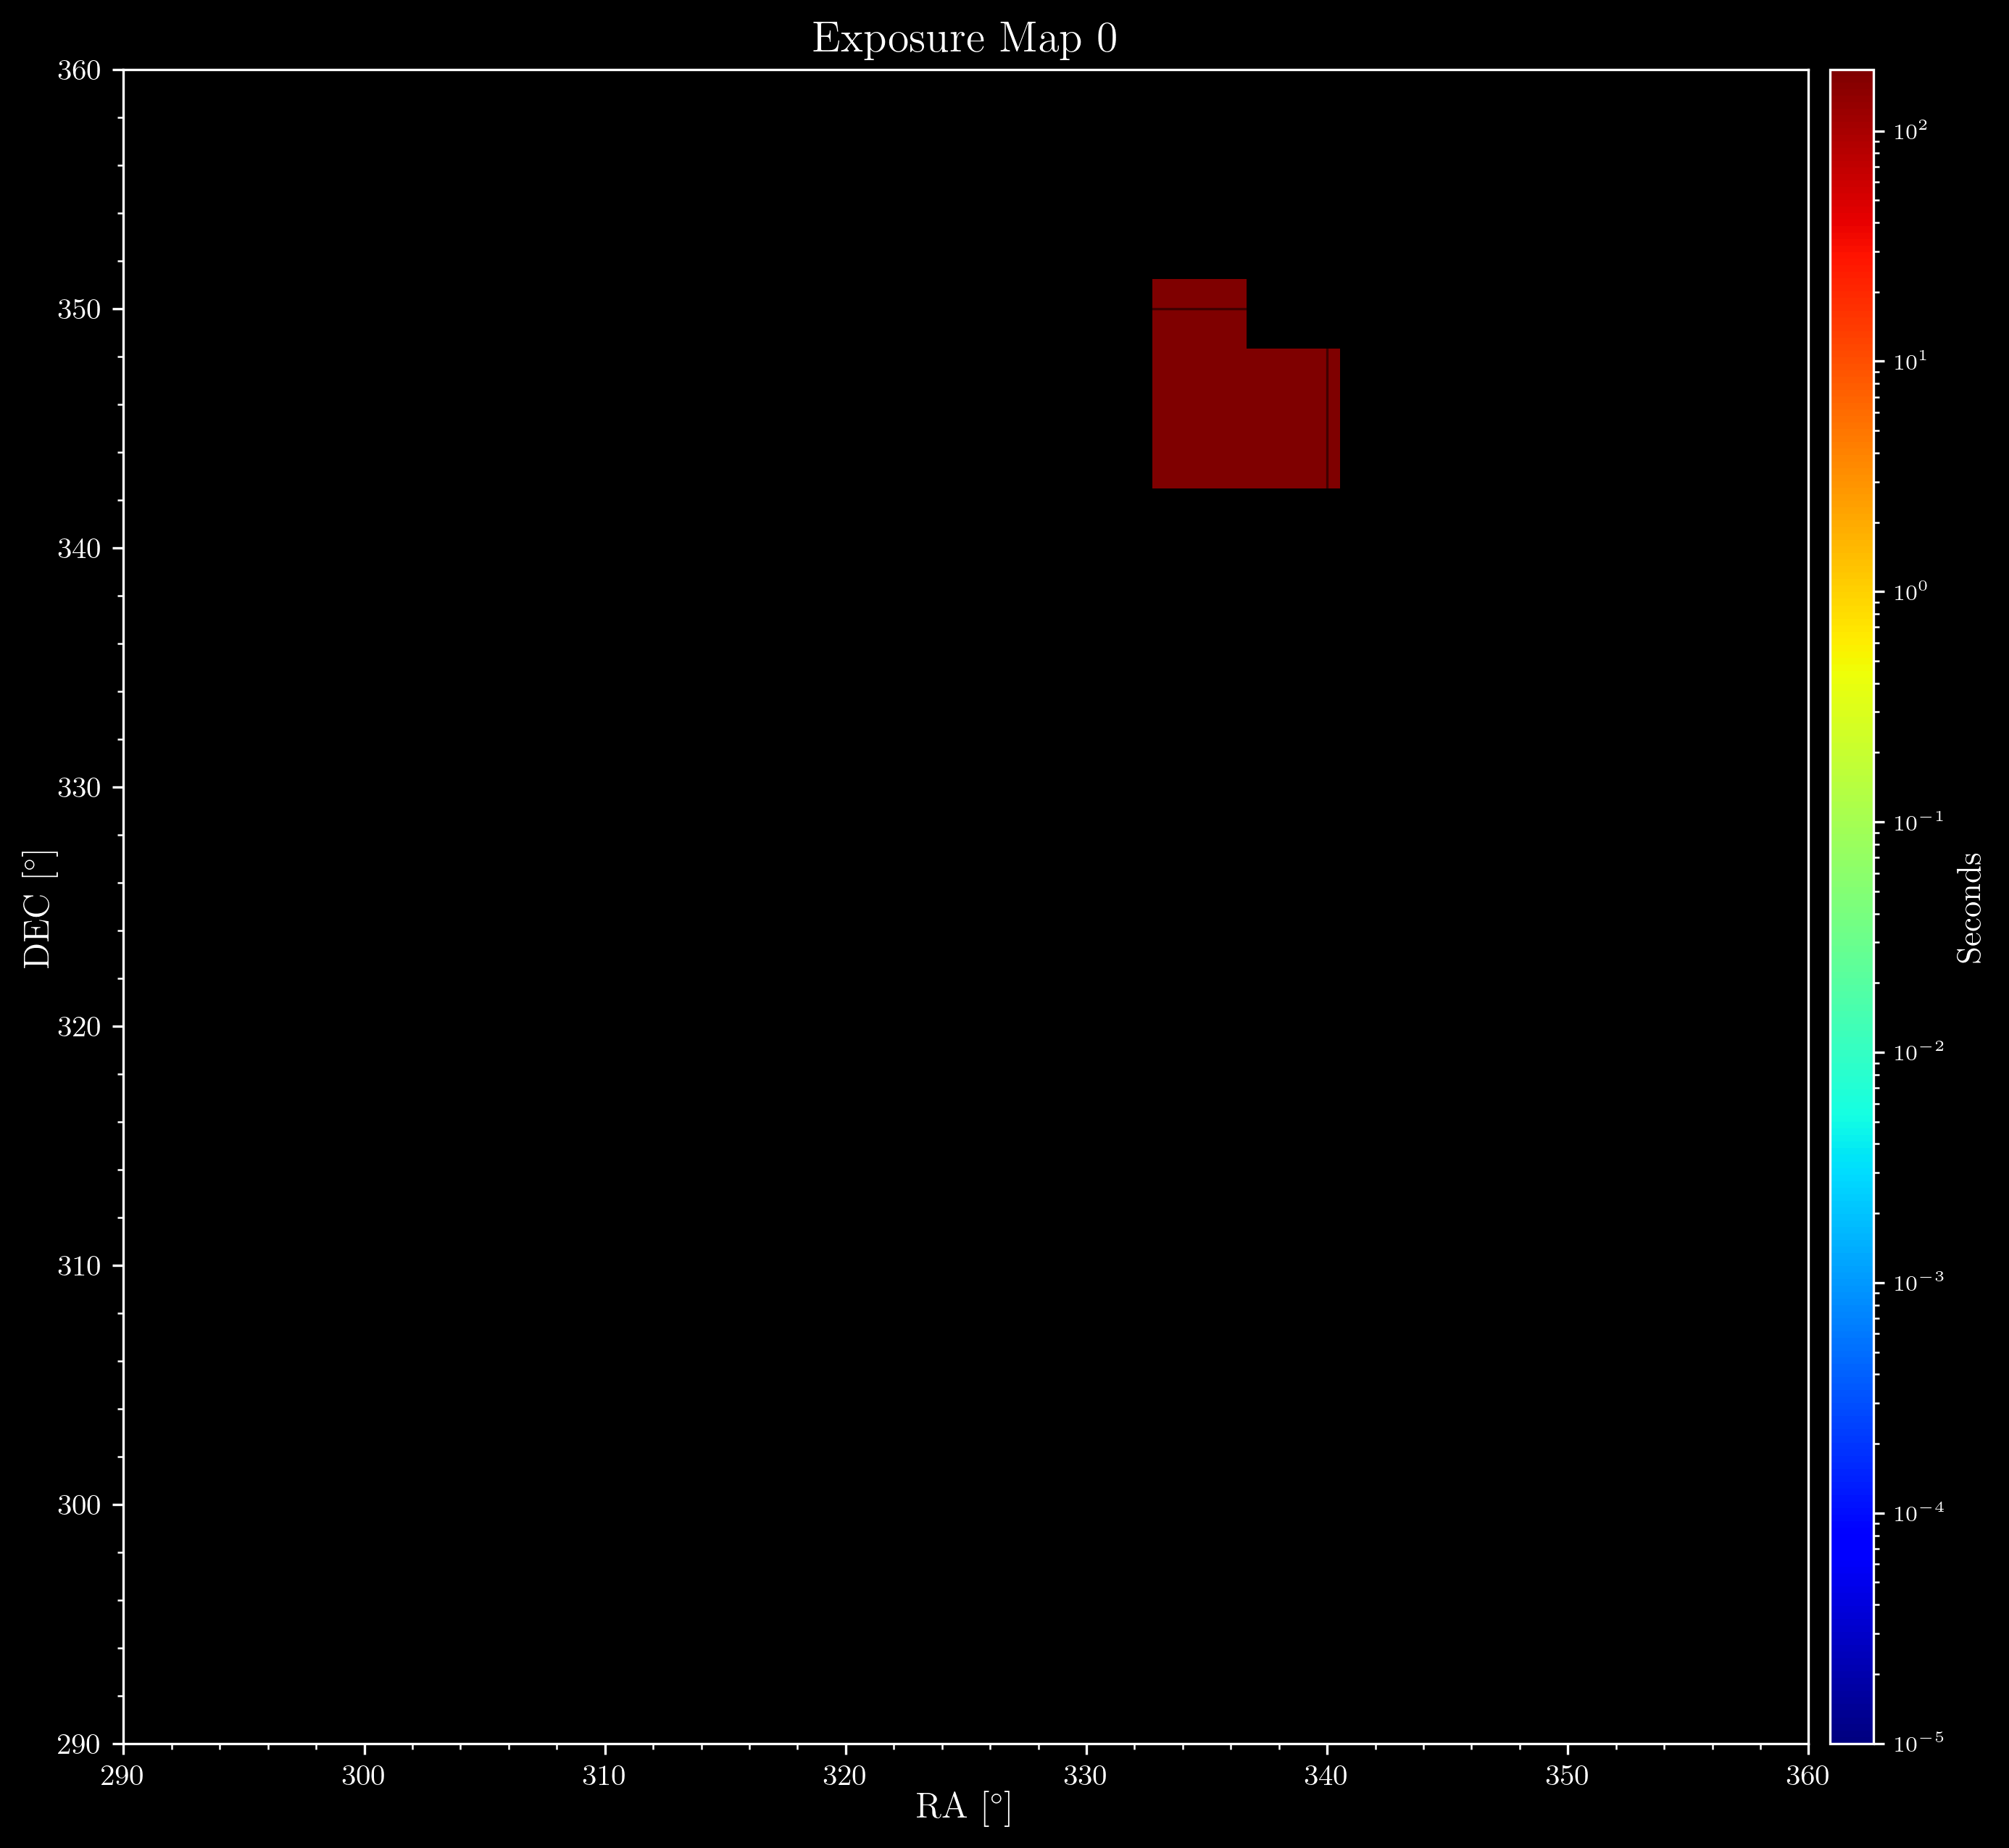

Saved figure to figures/sky_background/sky_background_0.png


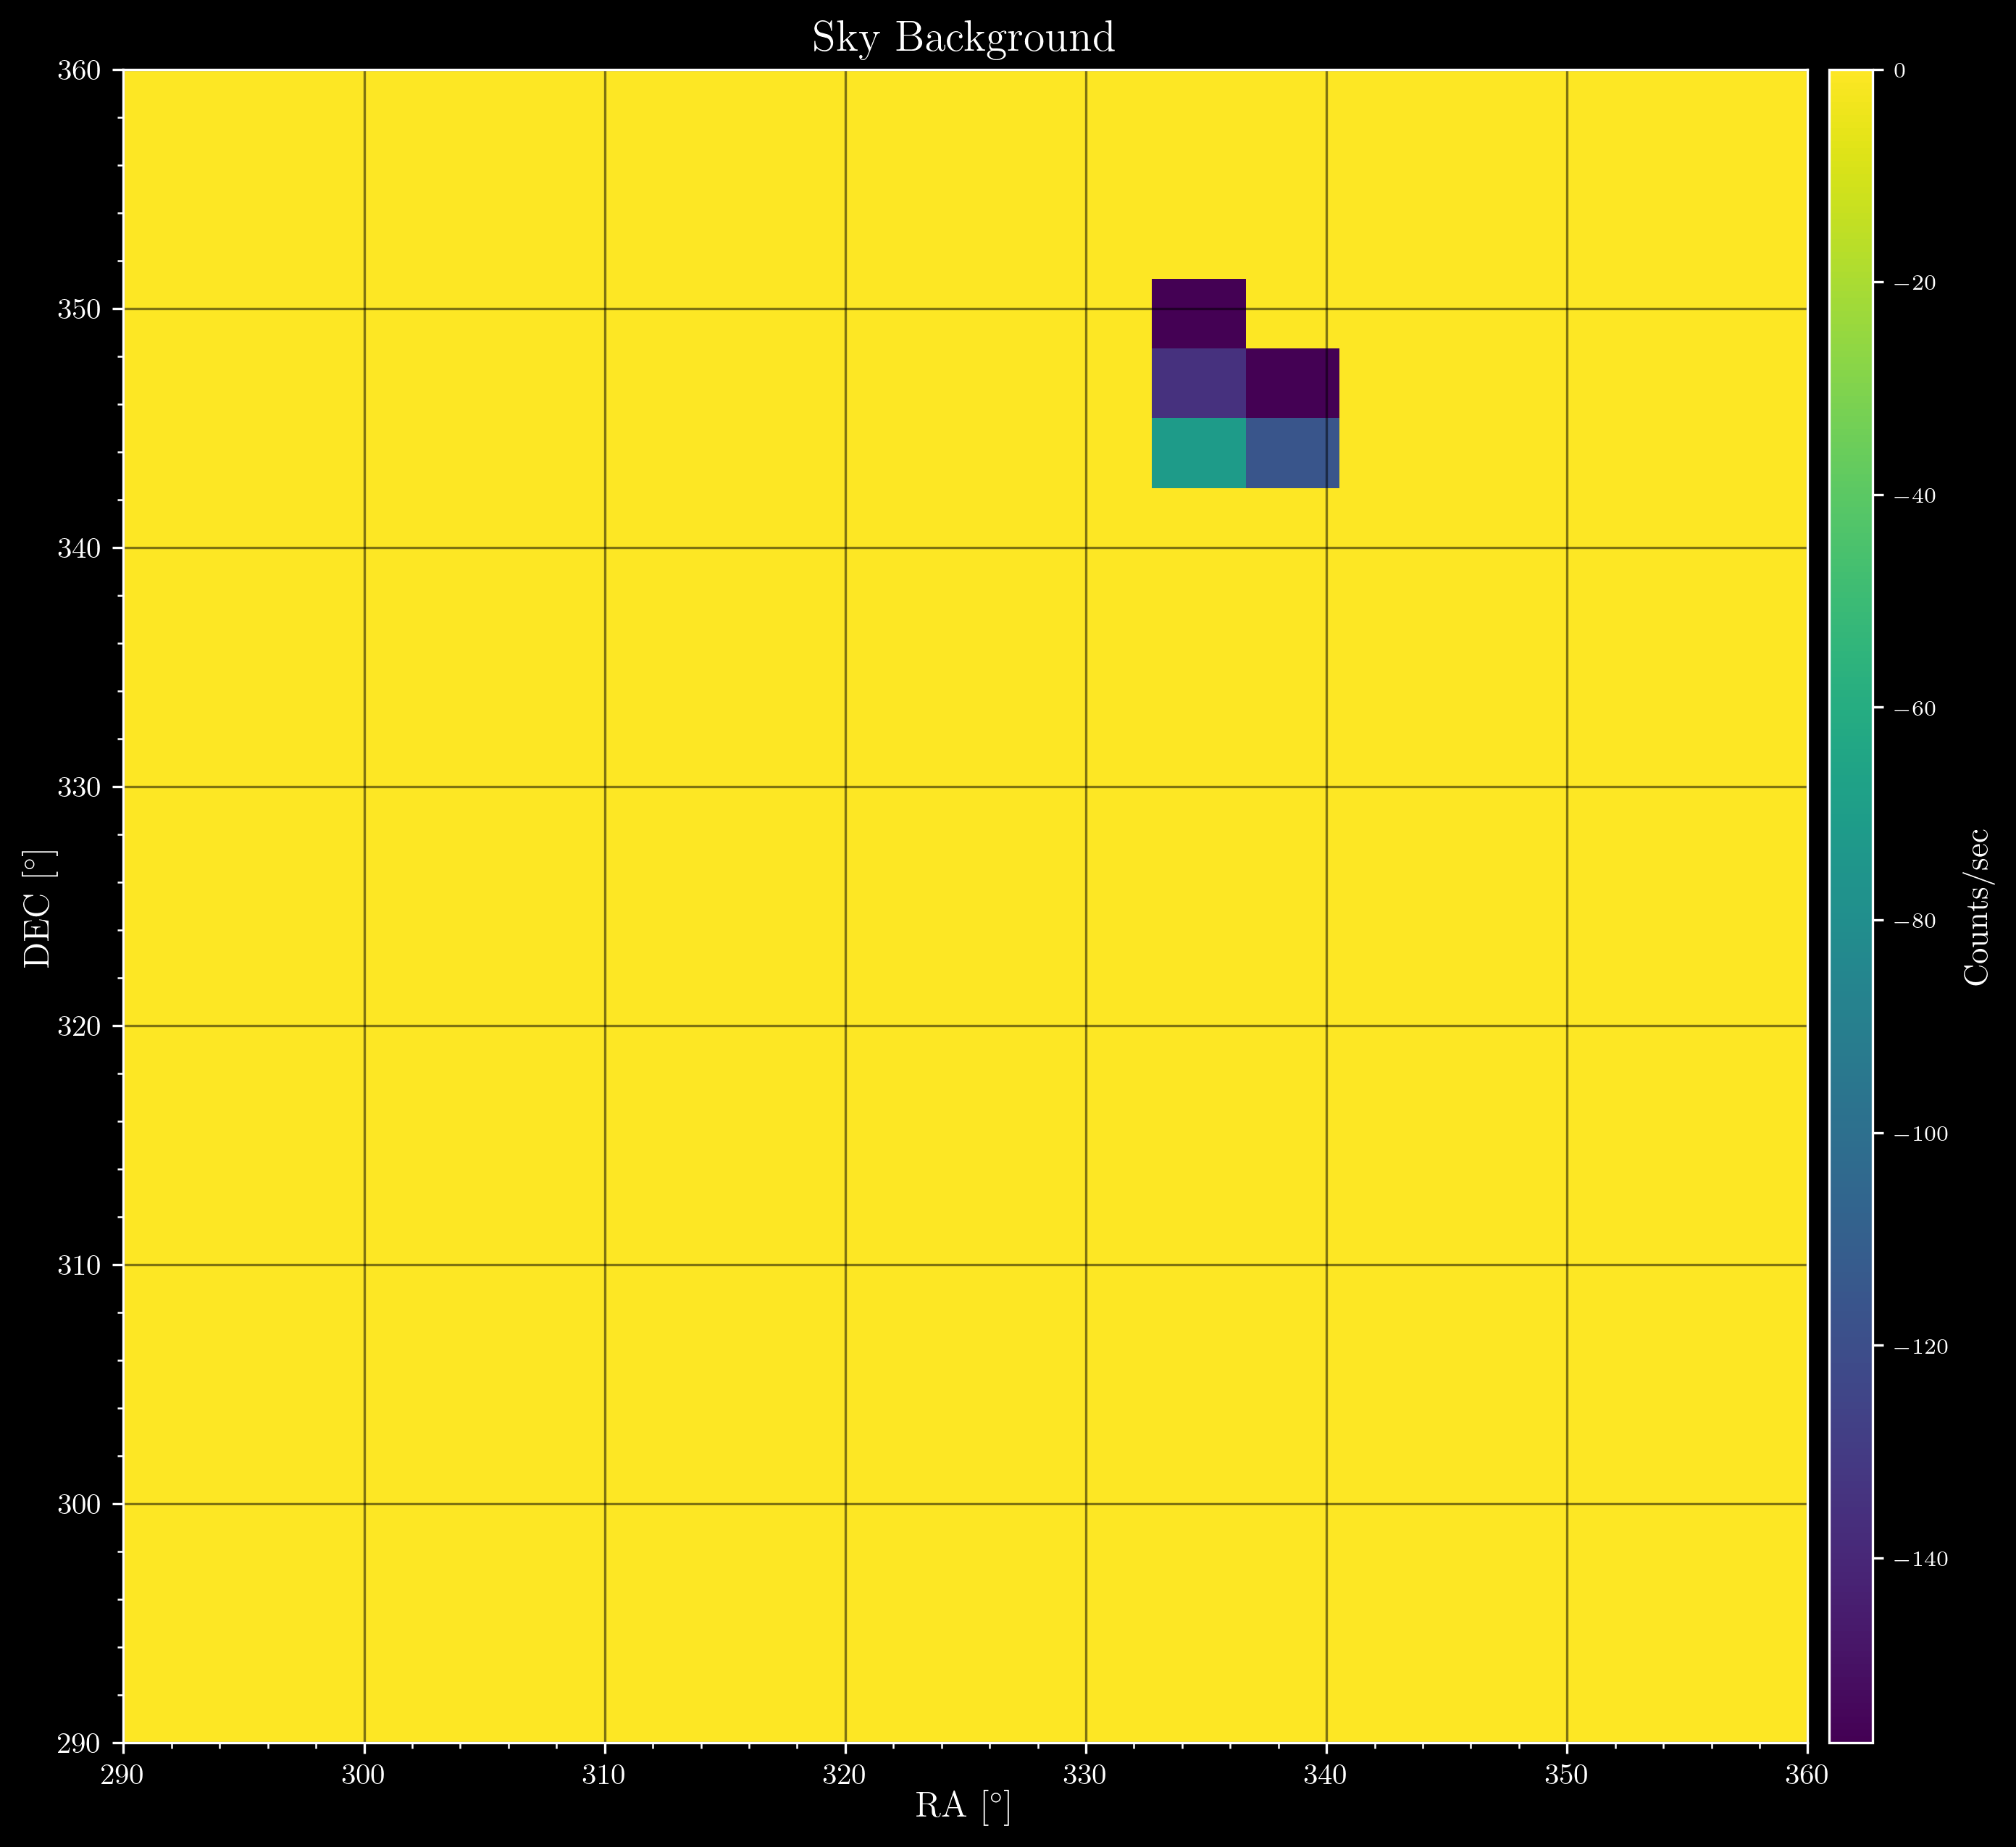

In [10]:
# Get sky backgrounds
skybgs, ra_arr, dec_arr = lexi.get_sky_backgrounds()


Extrema: RA min -1102.979736328125, RA max 331.99212646484375, DEC min -8373.873046875, DEC max 208.826904296875


/home/vetinari/Desktop/git/Lexi-Bu/lexi/lexi/lexi.py:228: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dfinterp = dfresamp.interpolate(method=self.interp_method)


Exposure map loaded from file  /home/vetinari/Desktop/git/Lexi-Bu/lexi/data/exposure_maps/lexi_exposure_map_Tstart_20240708_214341_Tstop_20240708_214748_RAstart_290_RAstop_360_RAres_4_DECstart_290_DECstop_360_DECres_3_Tint_247.npy 

Saving exposure maps as images
Saved figure to figures/exposure_maps/exposure_map_0.png


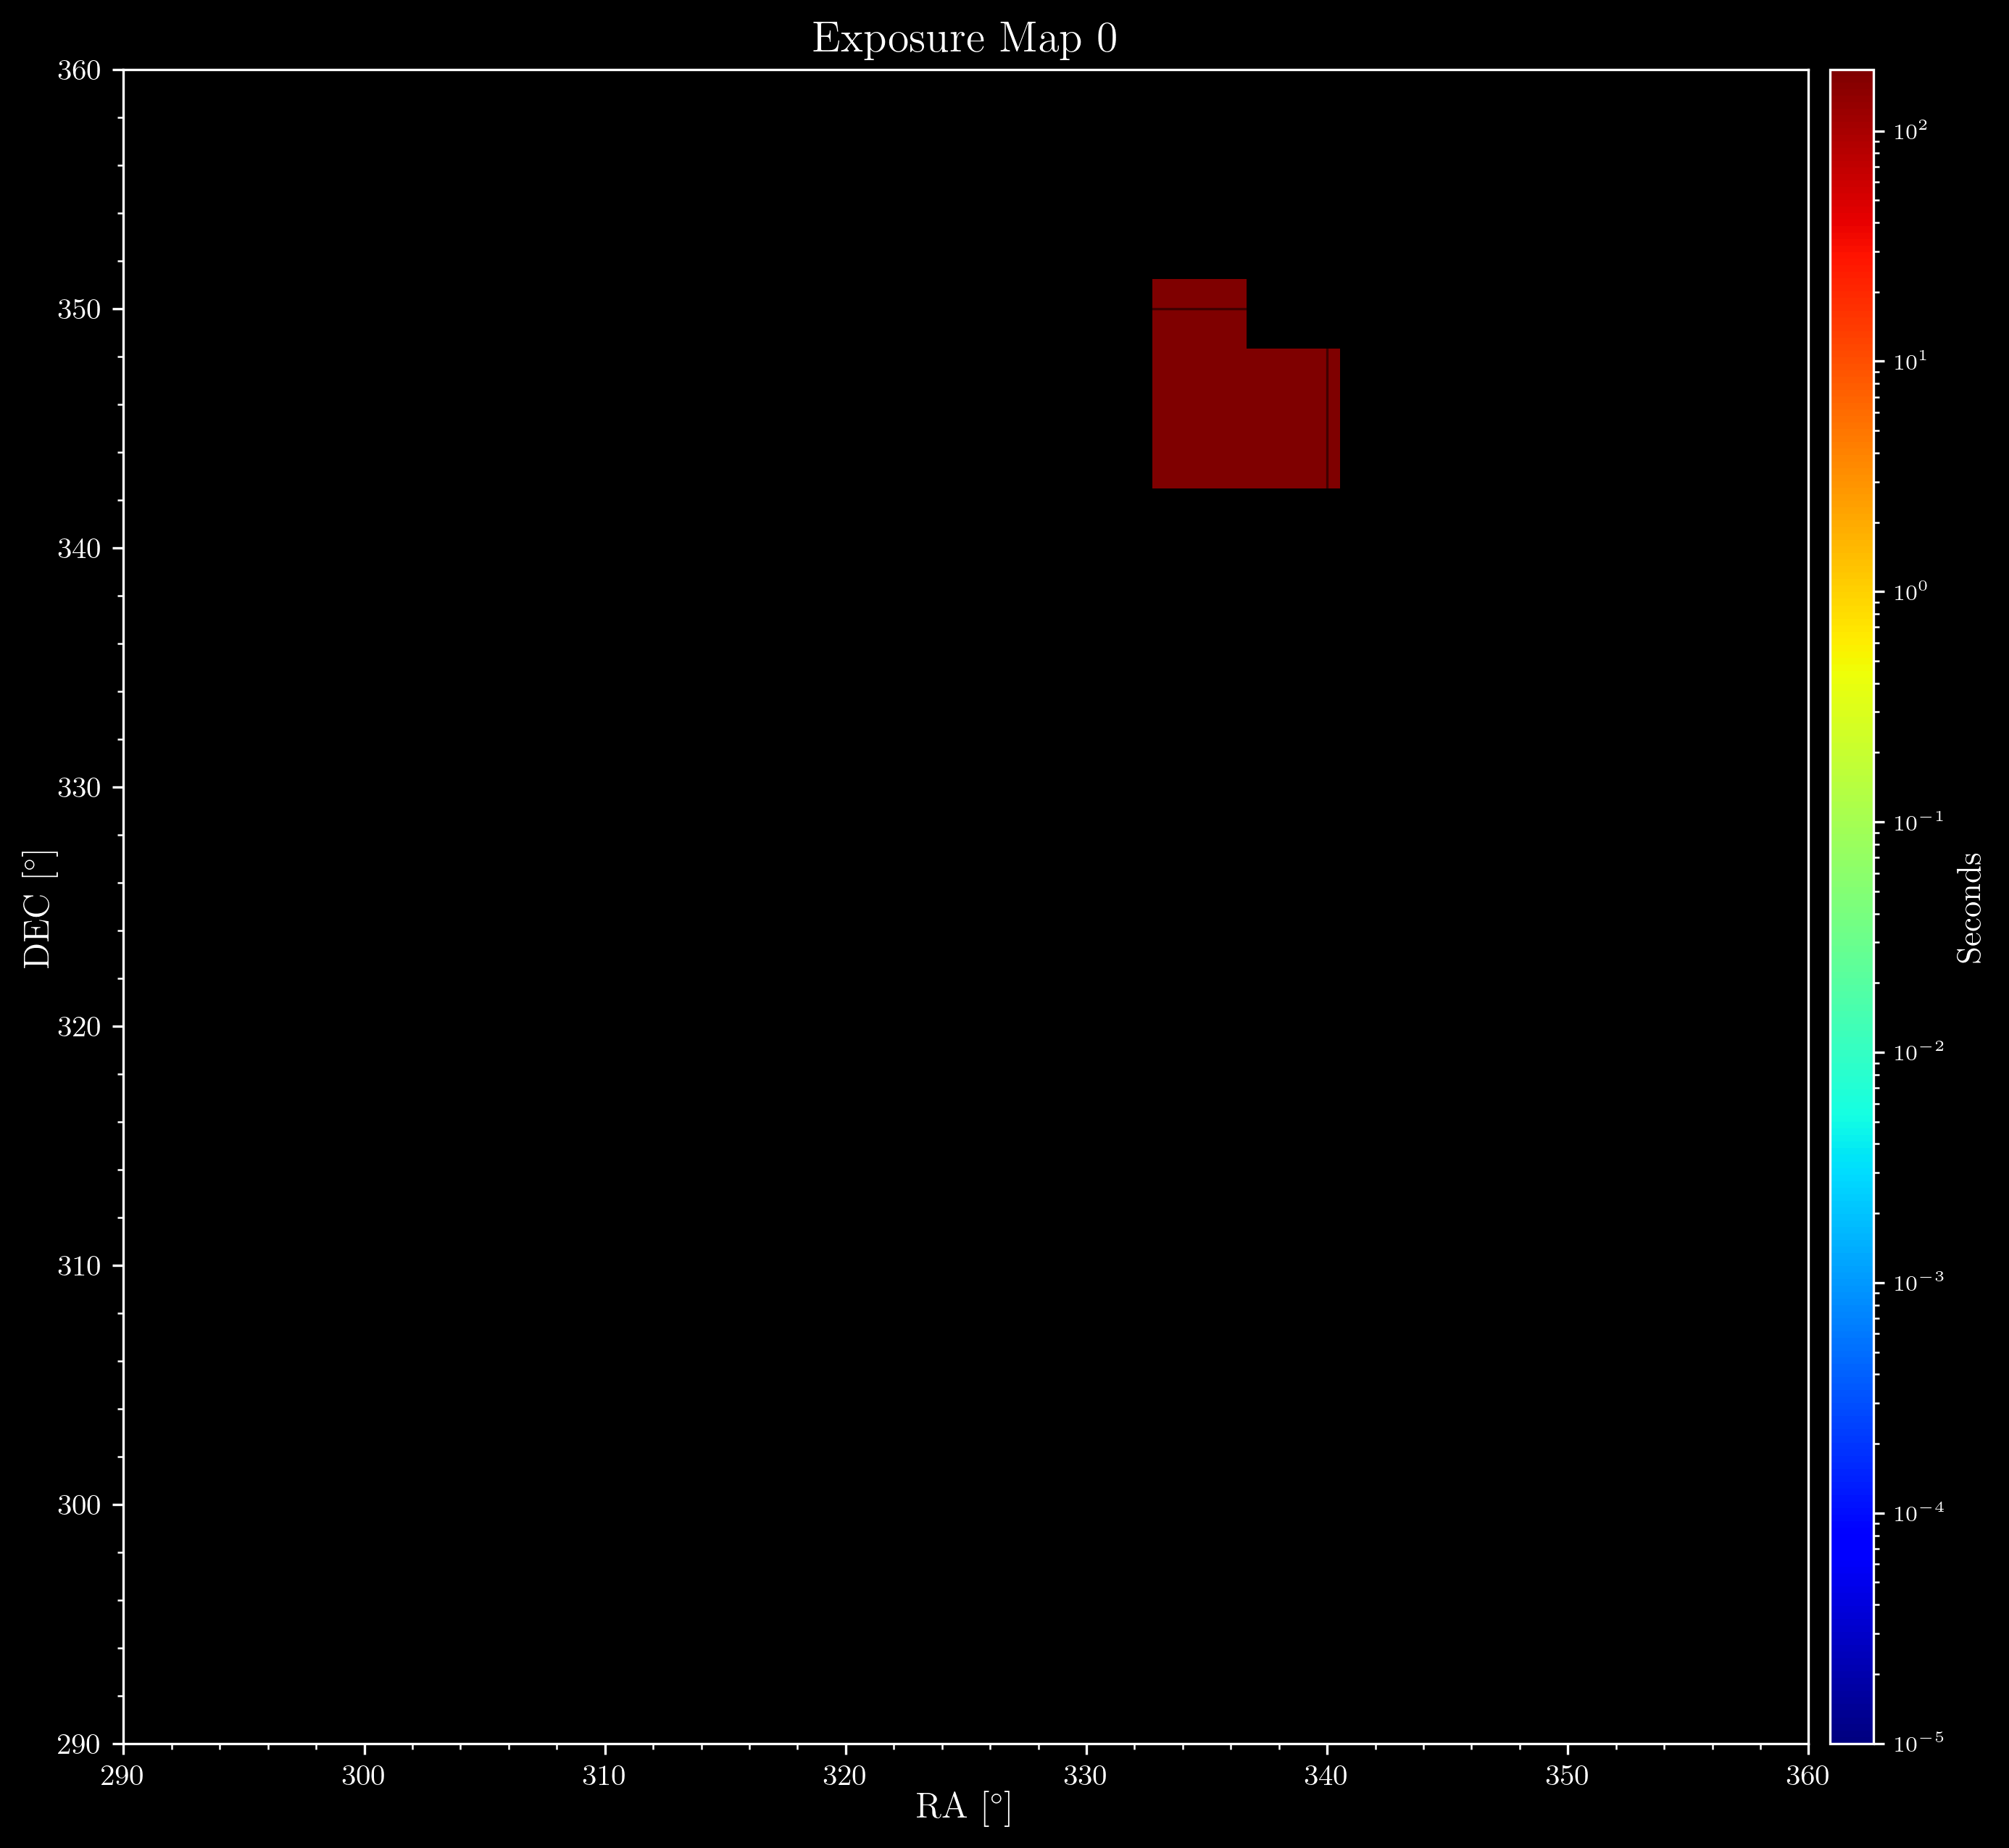

Saved figure to figures/sky_background/sky_background_0.png


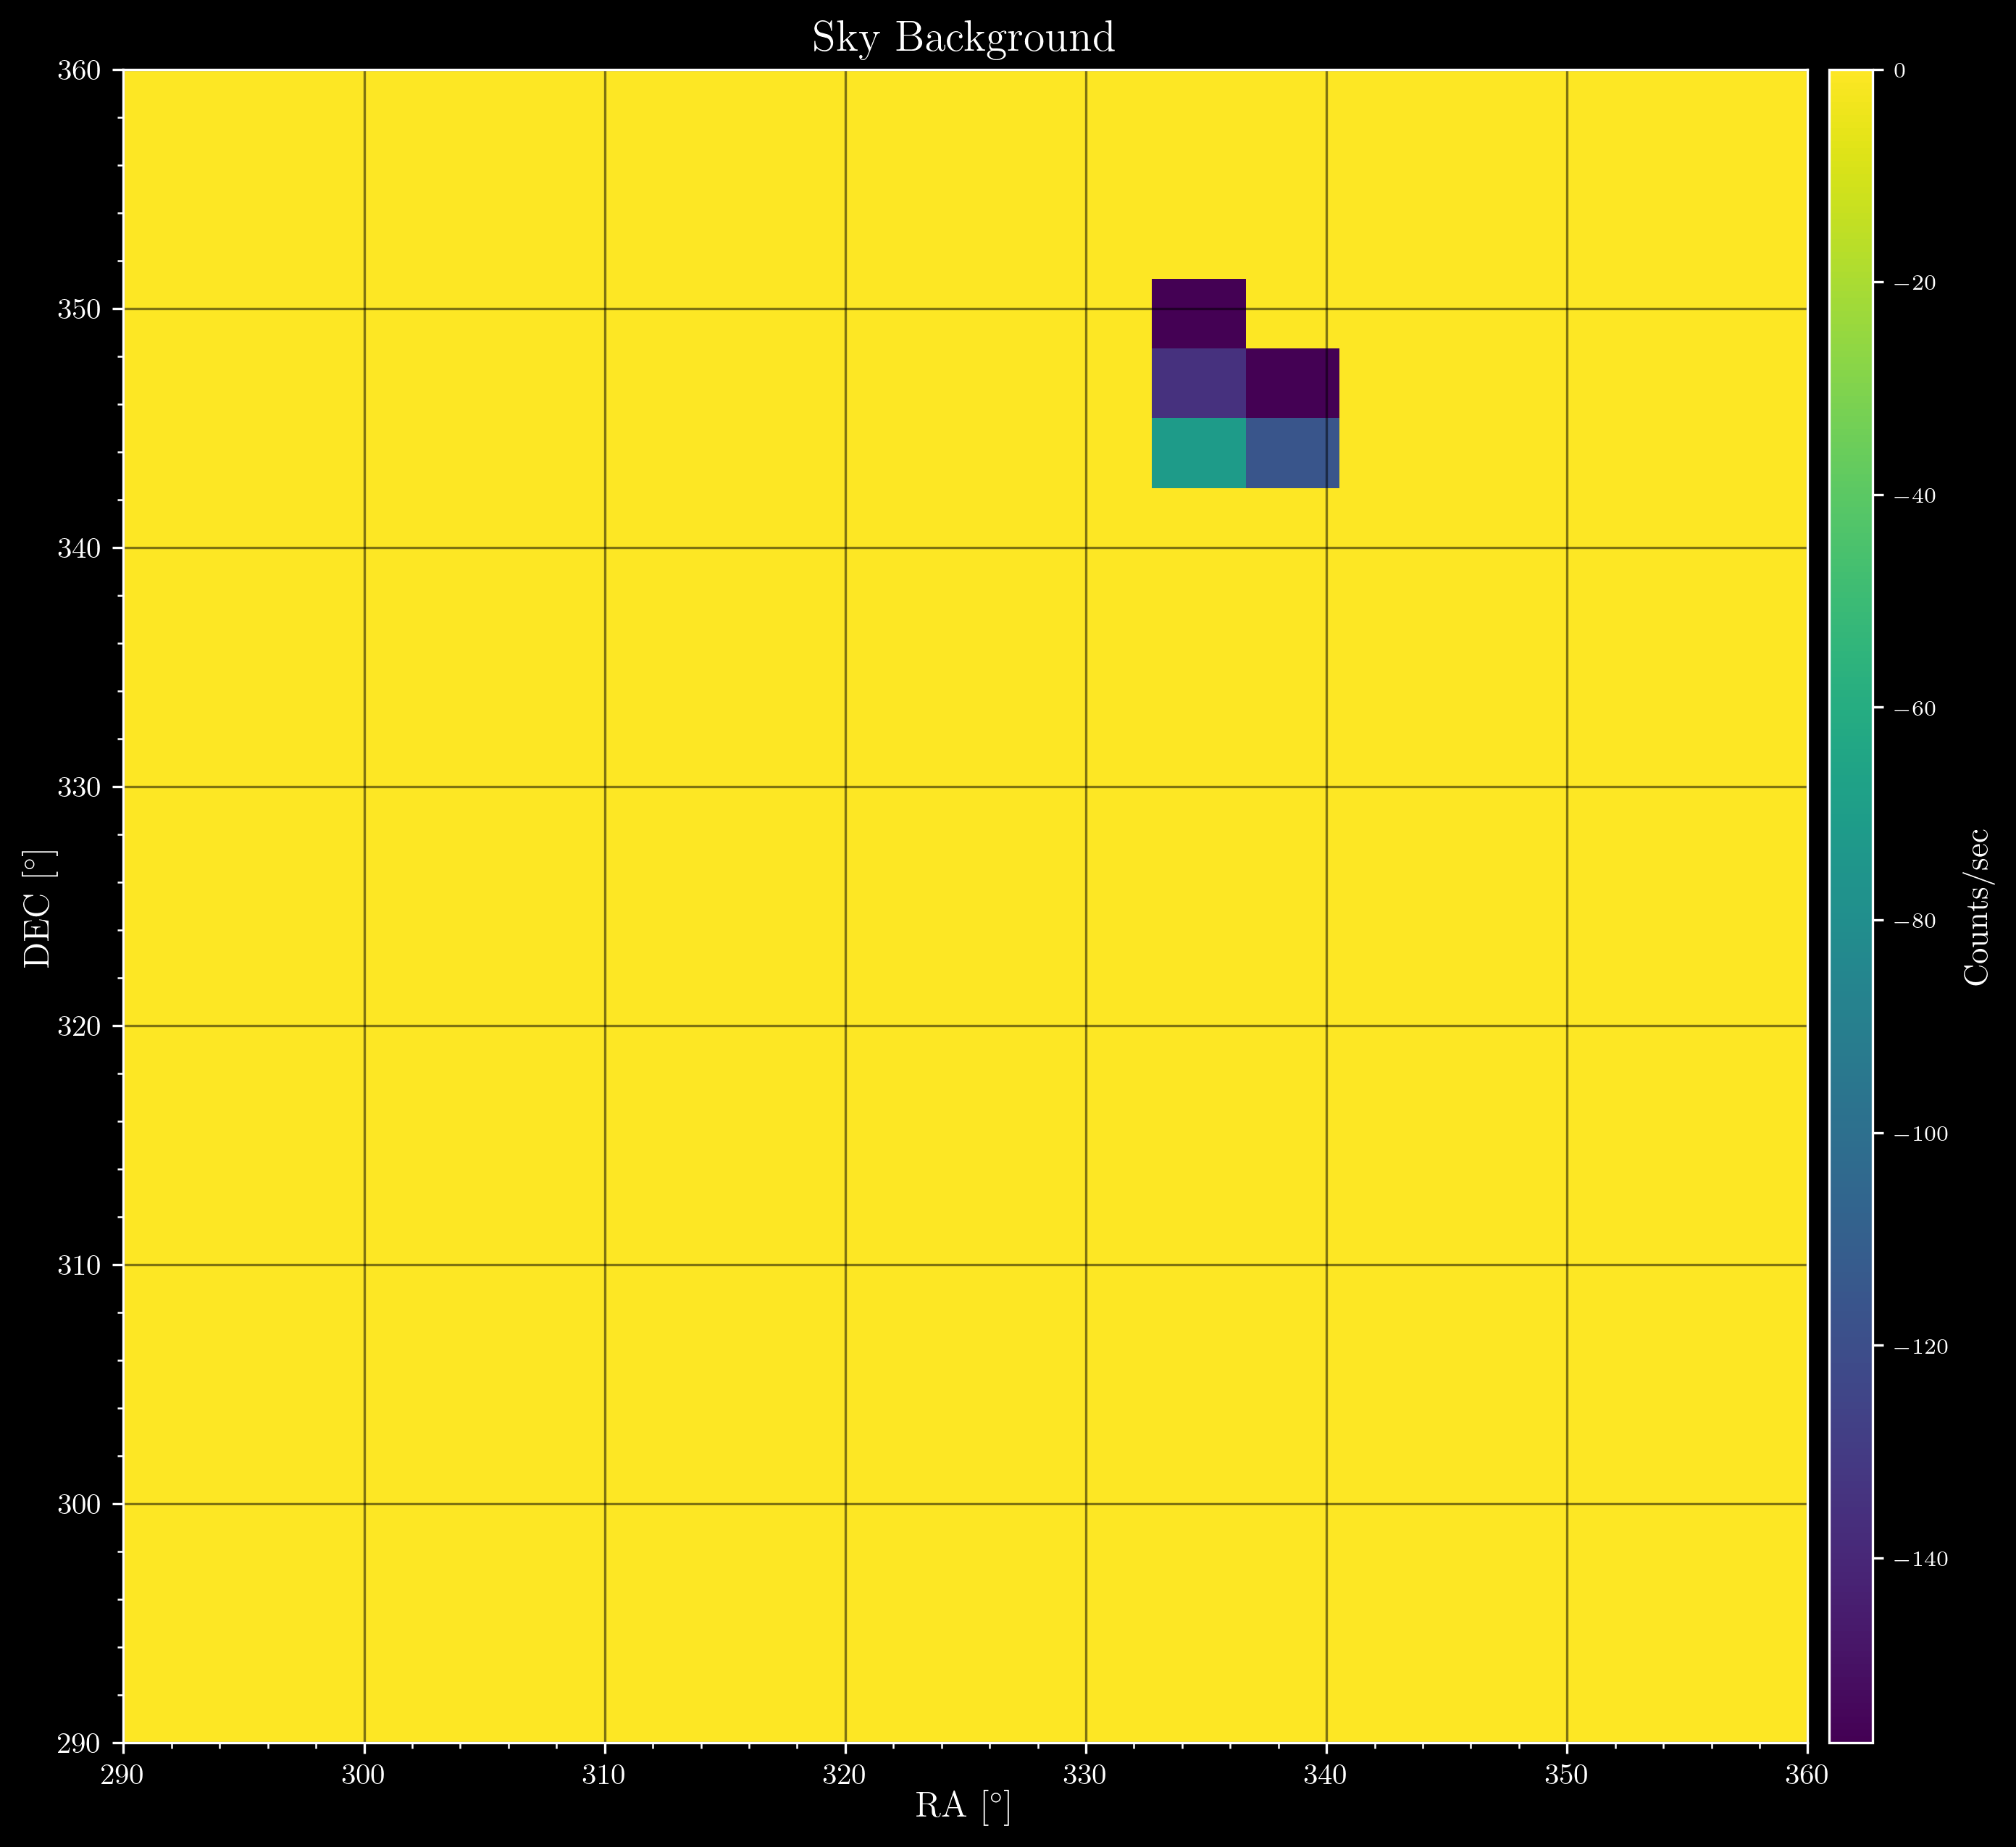

Saved figure to figures/lexi_images/lexi_image_0.png


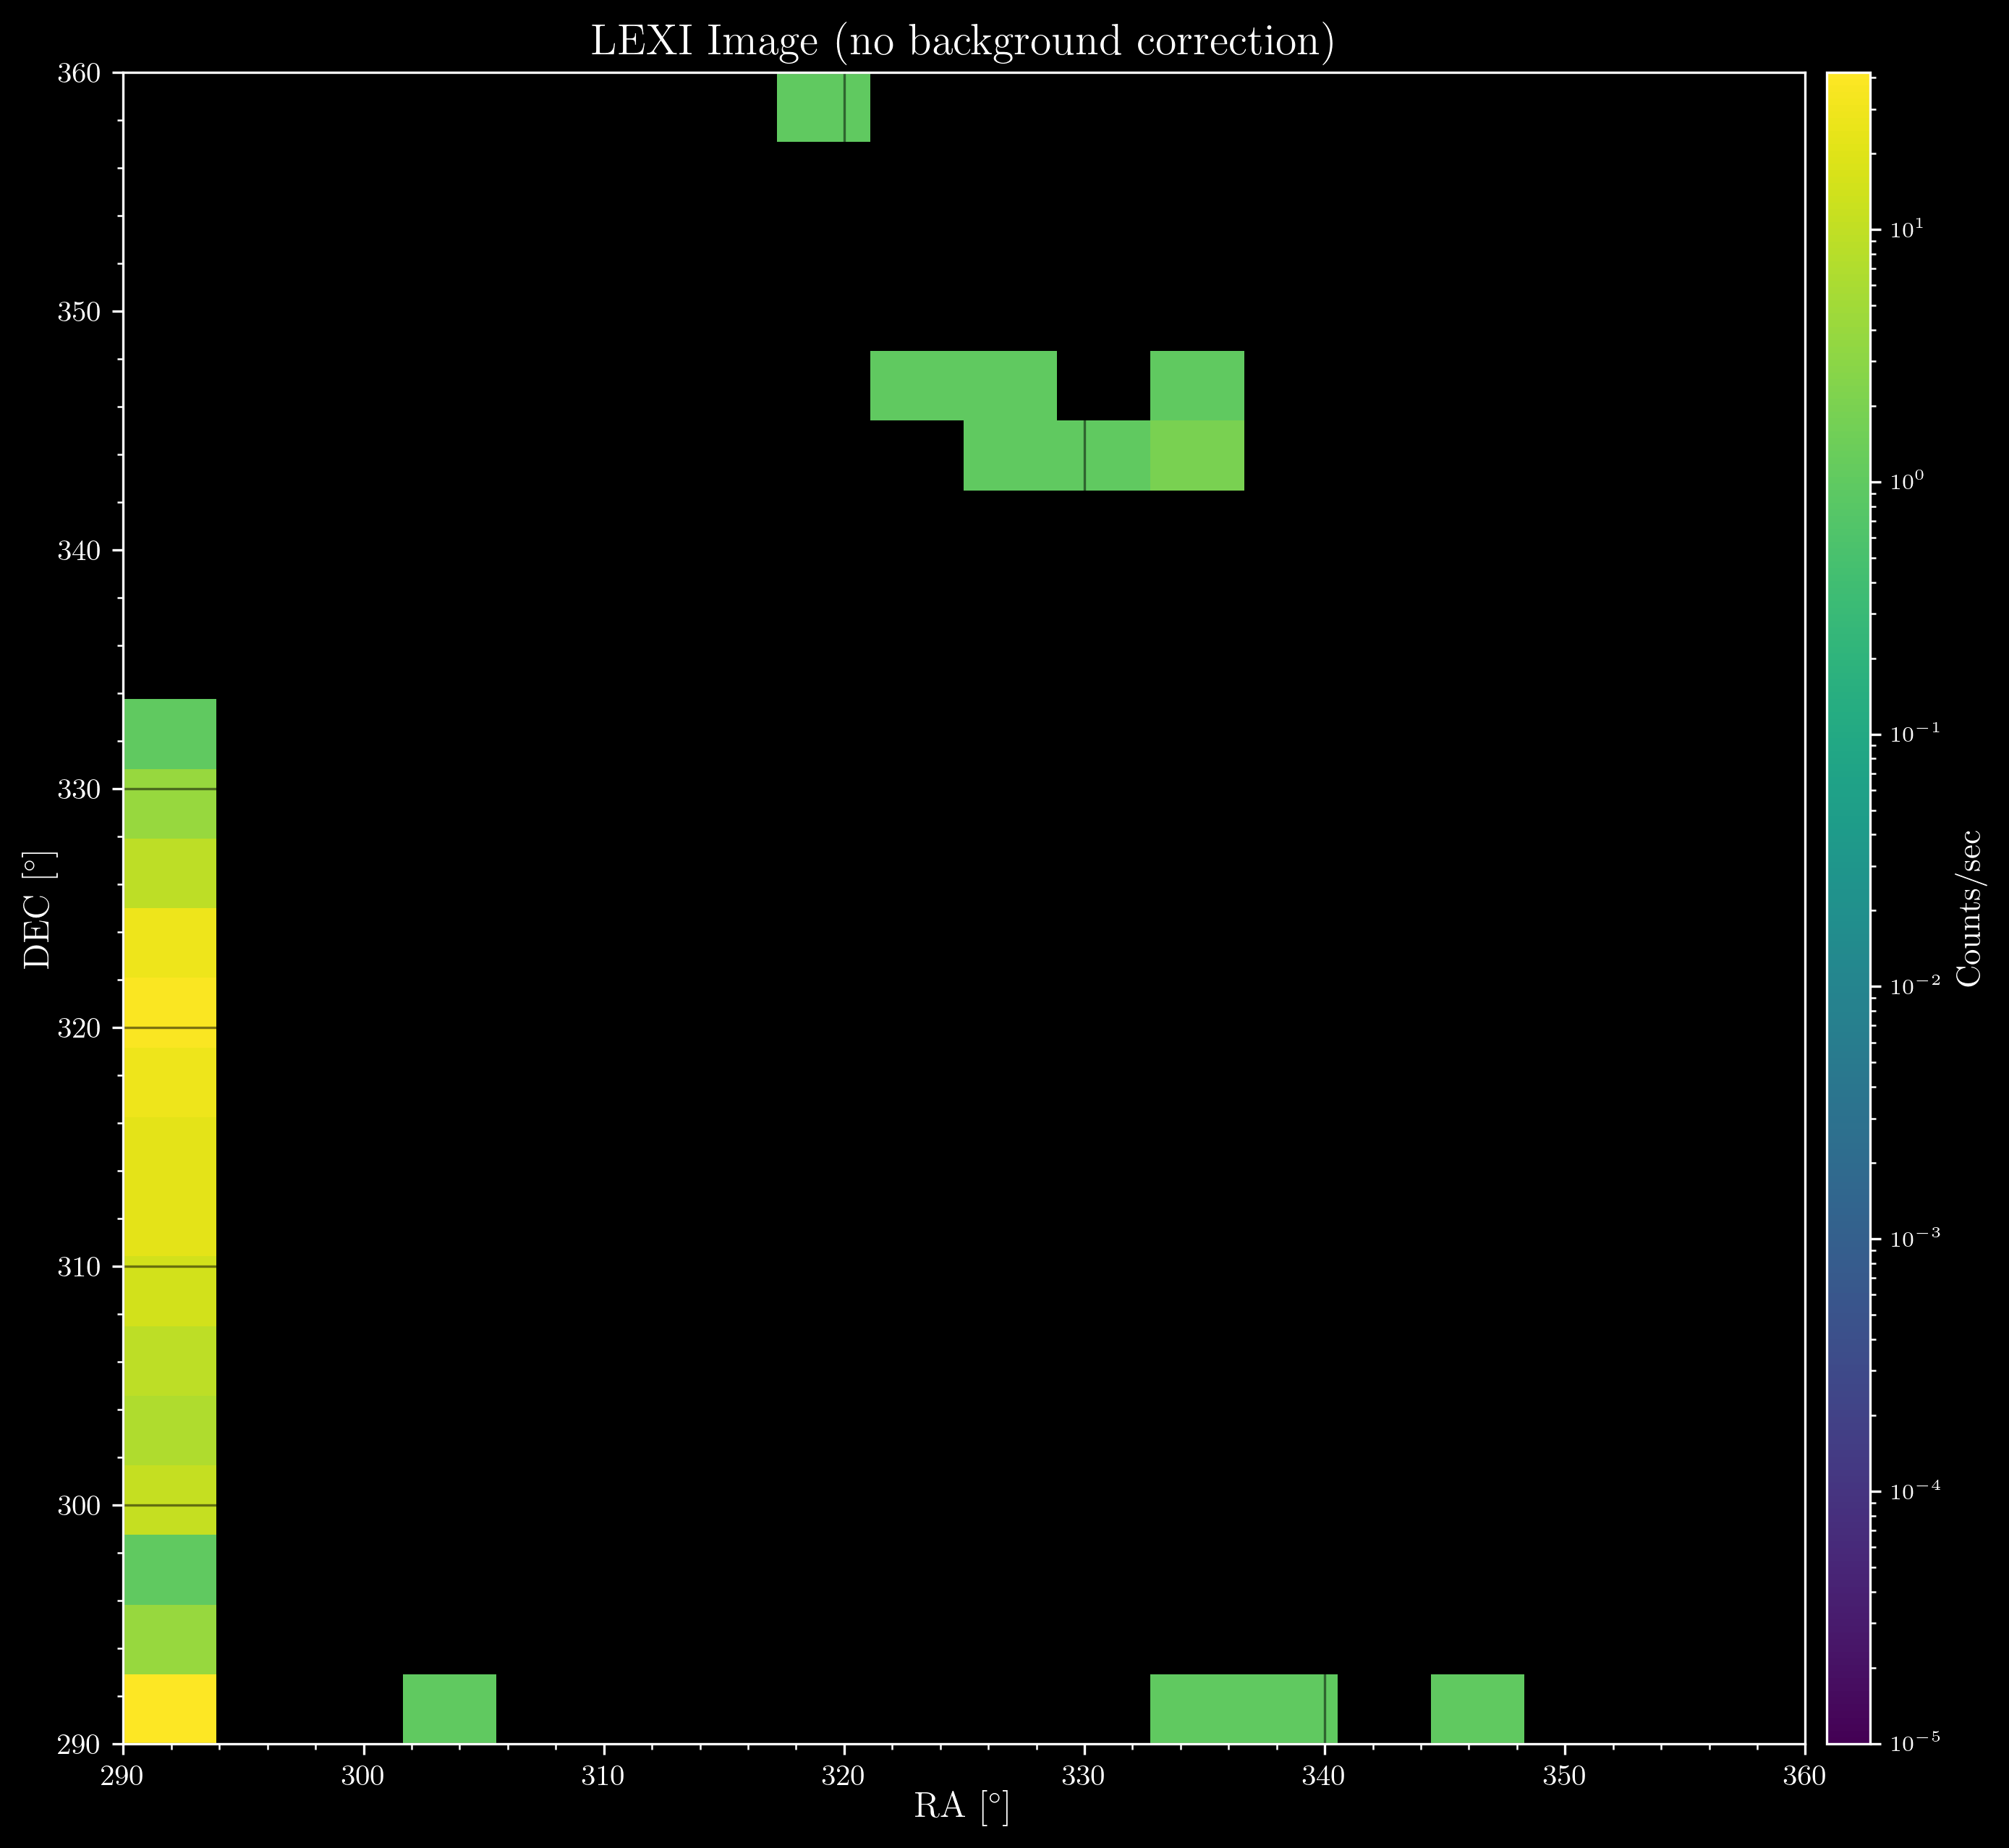

In [11]:
# Get background corrected images
lexi_image, ra_arr, dec_arr = lexi.get_lexi_images()


In [12]:
lexi_image.shape


(18, 24)

In [13]:
print(ra_arr.shape, dec_arr.shape)


(18,) (24,)
